In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import warnings
import pathlib
warnings.filterwarnings('ignore')


In [8]:
# Run on google colab or locally or on Kaggle 

if os.path.exists('/kaggle/input'):
    print('Running on Kaggle...')
    for dirname, _, filenames in os.walk('/kaggle/input'):
        print('Running on Kaggle...')
        for filename in filenames:
            print(os.path.join(dirname, filename))
            # Read the CSV file from Kaggle
            df = pd.read_csv(os.path.join(dirname, filename))
    print("Data loaded successfully from Kaggle!")
else:
    try:
        from google.colab import drive
        print('Running on CoLab...')
        drive.mount('/content/drive')
        # Read the csv file from Collab
        df = pd.read_csv('/content/drive/My Drive/ClassicHit.csv')
        print("Done!")
    except:
        print("Not running on Kaggle")
        # Download the data
        # This is the link for the data set
        # https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023/data
        !kaggle datasets download -d thebumpkin/10400-classic-hits-10-genres-1923-to-2023
    
        # Jupyter Notebook's path
        desktop = pathlib.Path.home() / 'Desktop'
        os.chdir(desktop) # This automatically transfer you to Desktop (suppose that your jupyter notebook is on Desktop)
    
        # Unzip the files
        with zipfile.ZipFile('./10400-classic-hits-10-genres-1923-to-2023.zip', 'r') as zip_ref:
            zip_ref.extractall('./Genre_Dataset')
    
    
        print('Changing Directory!')
        os.chdir('./Genre_Dataset')
        print('Current Directory: ', os.getcwd())
    
        # Read the csv from Desktop locally
        df = pd.read_csv('ClassicHit.csv')
    
        print("Done!")

Not running on Kaggle
Dataset URL: https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023
License(s): MIT
10400-classic-hits-10-genres-1923-to-2023.zip: Skipping, found more recently modified local copy (use --force to force download)
Changing Directory!
Current Directory:  C:\Users\PC\Desktop\Genre_Dataset
Done!


## Chapter 1
### Introductory information about the data set

In [9]:
'''
About Dataset

The dataset is a comprehensive collection of 15,150 classic hits from 3,083 artists, spanning
a century of music history from 1923 to 2023. This diverse dataset is divided into 19 distinct genres,
showcasing the evolution of popular music across different eras and styles. Each track in the dataset is
enriched with Spotify audio features, offering detailed insights into the acoustic properties, rhythm, tempo,
and other musical characteristics. This makes the dataset not only a valuable resource for exploring trends and
comparing genres but also for analyzing the sonic qualities that define classic hits across different time periods and genres.
'''

# Read the csv file
display(df)

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,7 Seconds (feat. Neneh Cherry),Youssou N'Dour,1994,306226,4,0.679,0.659,1,-10.826,0,0.0269,0.07710,0.000004,0.3160,0.528,154.171,47,World
15146,Birima,Youssou N'Dour,1995,228373,4,0.692,0.737,10,-7.042,1,0.0512,0.25400,0.017400,0.1120,0.808,105.754,18,World
15147,Set,Youssou N'Dour,2004,226826,4,0.733,0.730,0,-11.056,1,0.0479,0.04240,0.000101,0.0282,0.840,146.213,25,World
15148,Africa Remembers,Youssou N'Dour,2007,560466,4,0.696,0.378,5,-16.181,0,0.0797,0.44400,0.019400,0.0850,0.551,97.677,8,World


In [10]:
# Print the head of the data set
df.head()

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [11]:
# print the shape aka the number of rows, columns
print(f"The number of rows are: {df.shape[0]} and the number of columns are: {df.shape[1]}")

The number of rows are: 15150 and the number of columns are: 18


In [12]:
# print the columns and the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [13]:
# print the descriptive statistics
df.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000
mean,1984.709769,2.413028e+05,3.921650,0.574667,0.617691,5.257624,-9.154545,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809
std,19.482460,1.057966e+05,0.348322,0.166208,0.239527,3.569713,4.289558,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038
min,1899.000000,2.300000e+04,0.000000,0.000000,0.000098,0.000000,-47.359000,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000
25%,1971.000000,1.803700e+05,4.000000,0.461000,0.442000,2.000000,-11.736750,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000
50%,1983.000000,2.228525e+05,4.000000,0.582000,0.644000,5.000000,-8.480500,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000
75%,1998.000000,2.751530e+05,4.000000,0.696000,0.819000,8.000000,-5.955500,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000
max,2024.000000,3.060650e+06,5.000000,0.988000,0.999000,11.000000,0.919000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000


In [14]:
# Check if there are any missing values
print(f"The total missing values are: {df.isnull().sum().sum()}")

The total missing values are: 0


In [15]:
# Check the number of artists and also the number of genres and which genres appeared in the data set
print(f"The number of artists are {df['Artist'].unique().shape[0]}")
print(f"The number of genres are {df['Genre'].unique().shape[0]}")
print(f"The Genres are: {', '.join(df['Genre'].unique())}")


The number of artists are 3083
The number of genres are 19
The Genres are: Alt. Rock, Blues, Country, Disco, EDM, Folk, Funk, Gospel, Jazz, Metal, Pop, Punk, R&B, Rap, Reggae, Rock, SKA, Today, World


In [16]:
# As we can see from the data set, the columns Time_Signature, Key and Mode are categorical attributes. So we'll find the number of unique values
print(f"Time_Signature column unique values: {df['Time_Signature'].unique().shape[0]}")
print(f"Key column unique values: {df['Key'].unique().shape[0]}")
print(f"Mode column unique values: {df['Mode'].unique().shape[0]}")

Time_Signature column unique values: 5
Key column unique values: 12
Mode column unique values: 2


## Chapter 2
### Visualizations (Exploratory Data Analysis)

In [17]:
# First we are going to change the duration to seconds because we suppose that the duration column is milliseconds
df_v1 = df.copy()
df_v1['Duration'] = round(df_v1['Duration']/1000).astype(int)

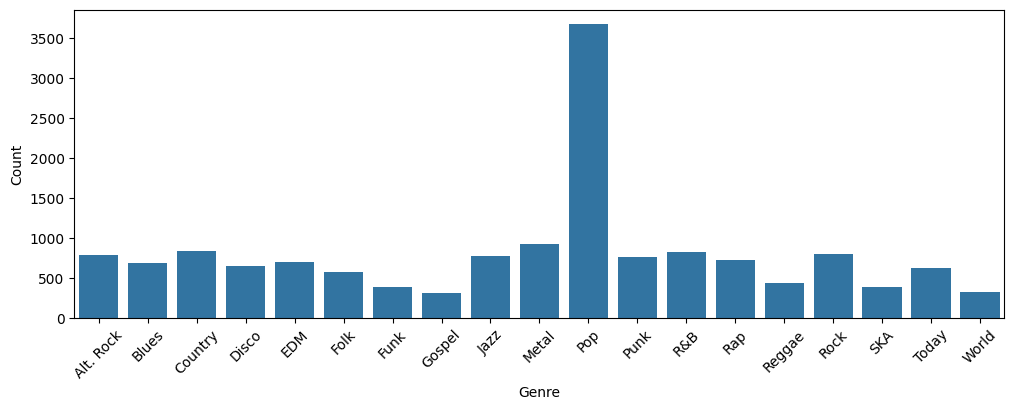

In [18]:
# 1. We'll start with the column 'Genre'

plt.figure(figsize=(12, 4))
sns.barplot(df.groupby('Genre').count()['Track'].reset_index(), x = 'Genre', y = 'Track')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

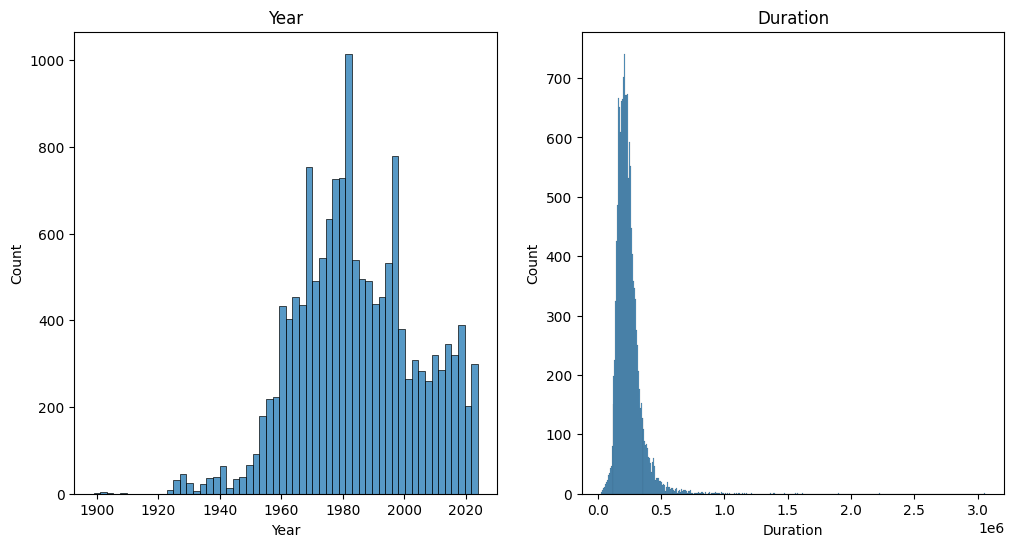

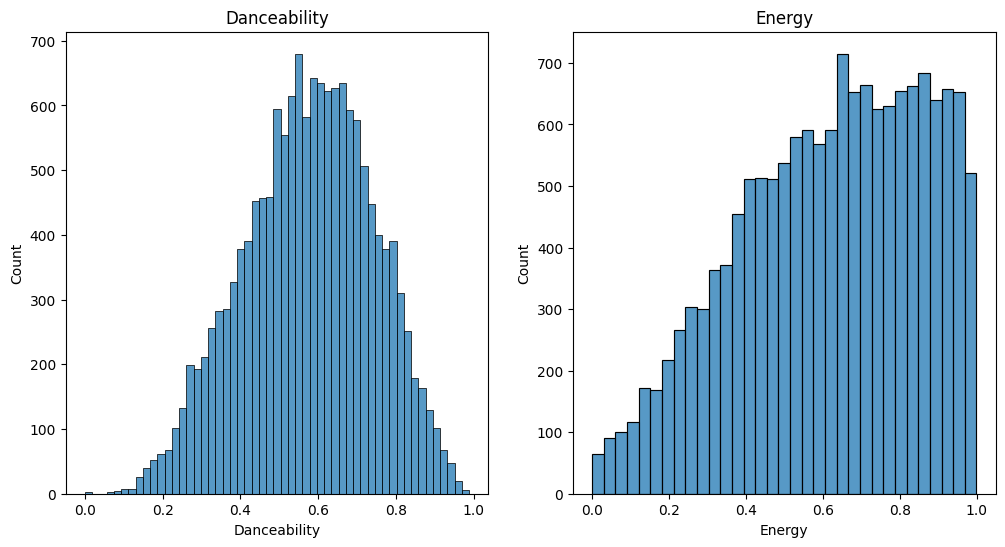

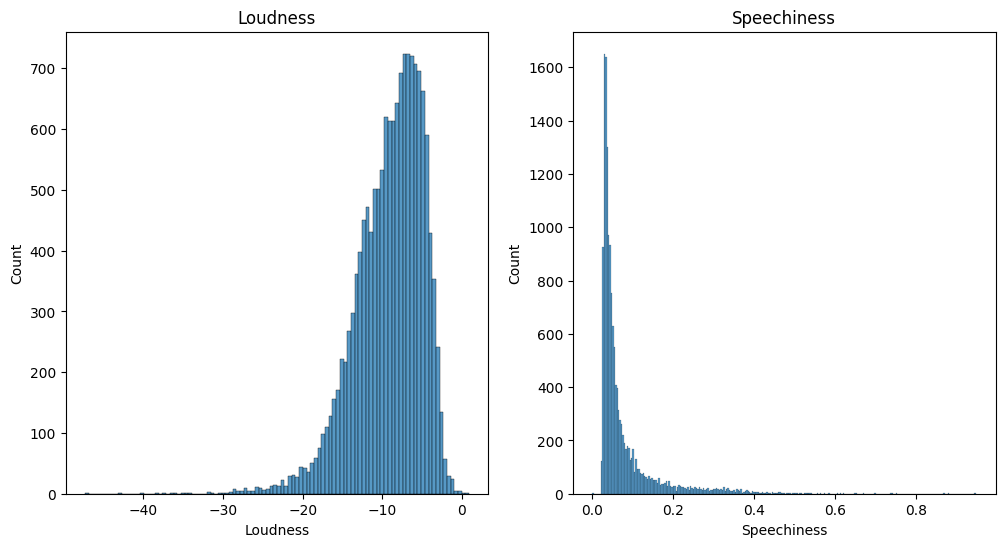

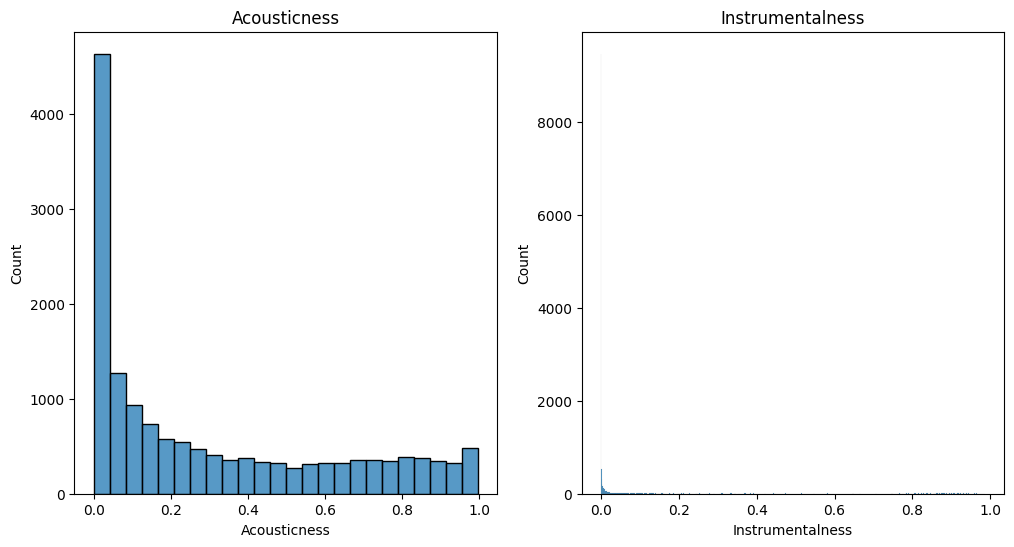

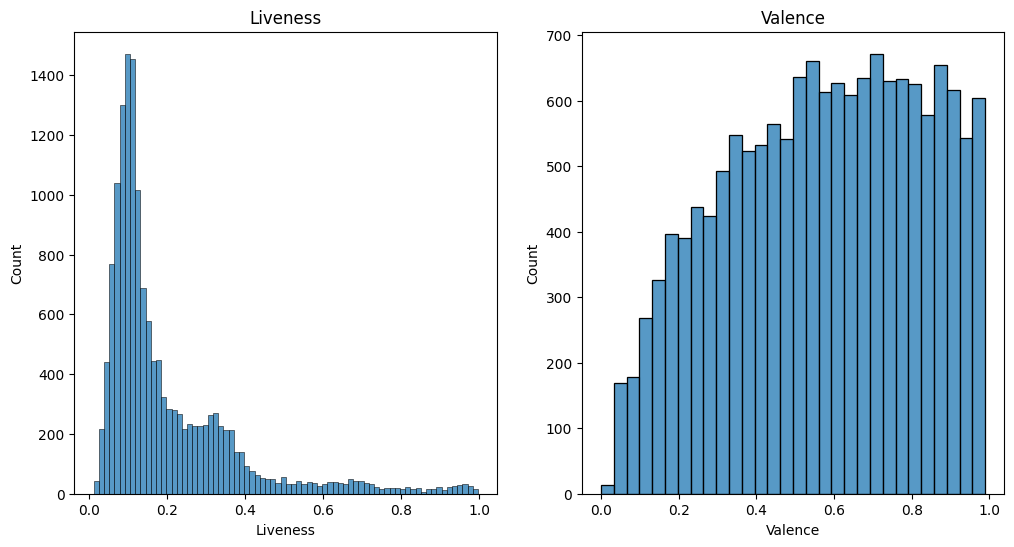

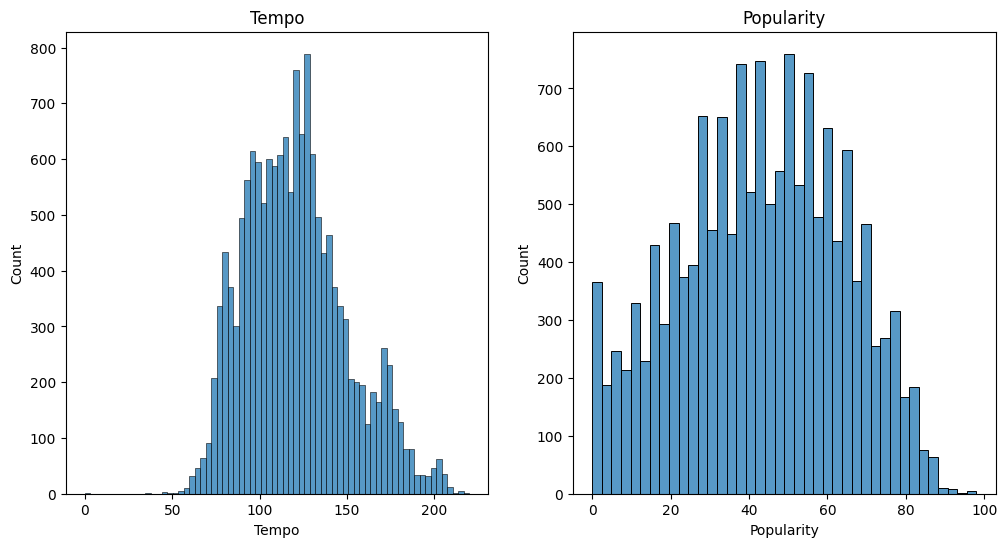

In [19]:

# 2. Due to the fact that the columns 'Year', 'Duration', Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
# 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity' are numerical variables/attributes we are going to use
# for each attribute a histogram plot to observe how the values are distributed
# So we are going to create 12 histogram plots all together (6x2)


def histogram_plot(col1, col2):
    f, axs = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(data = df, x = col1, ax = axs[0])
    axs[0].set_title(col1)
    sns.histplot(data = df, x = col2, ax = axs[1])
    axs[1].set_title(col2)
    plt.show()

# Function to send two elements at a time
def send_columns(arr):
    for i in range(0, len(arr), 2):
        if i + 1 < len(arr):
            histogram_plot(arr[i], arr[i + 1])

columns = ['Year', 'Duration', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness','Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity']
send_columns(columns)


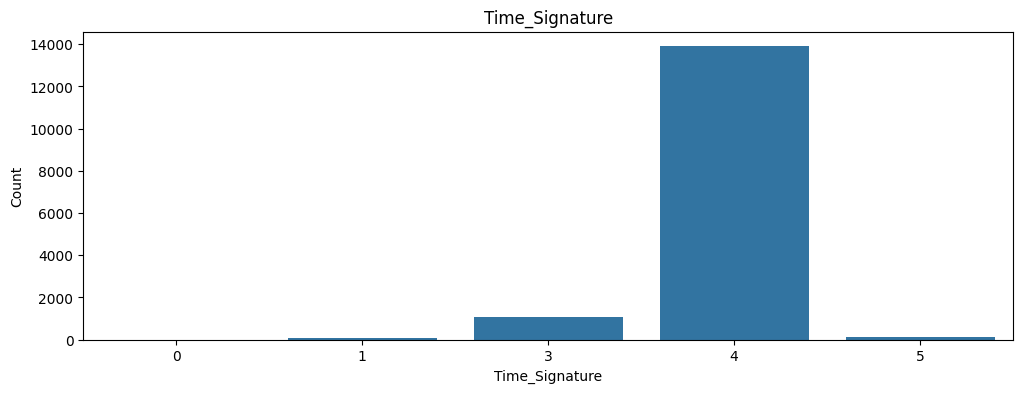

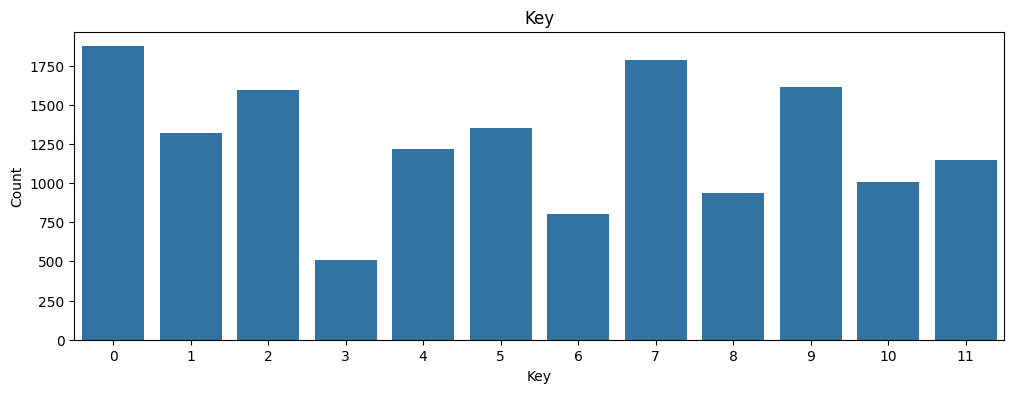

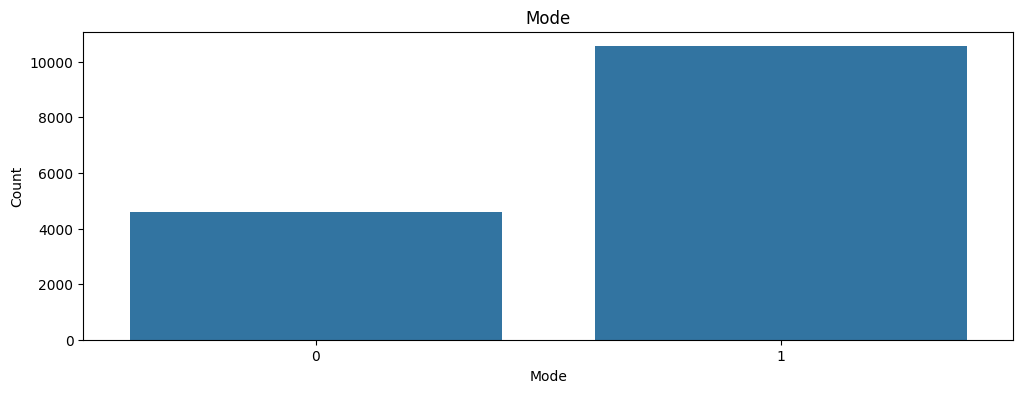

In [20]:
# 3. For the columns 'Time_Signature', 'Key' and 'Mode' we are going to plot a bar plot

def bar_plot(col):
    plt.figure(figsize=(12, 4))
    fun_data = pd.DataFrame(df[col].value_counts()).reset_index()
    fun_data = fun_data.rename(columns={'count': 'Count'})
    sns.barplot(data = fun_data, x = col, y = 'Count')
    plt.title(col)
    plt.show()

columns = ['Time_Signature', 'Key', 'Mode']
for column in columns:
    bar_plot(column)


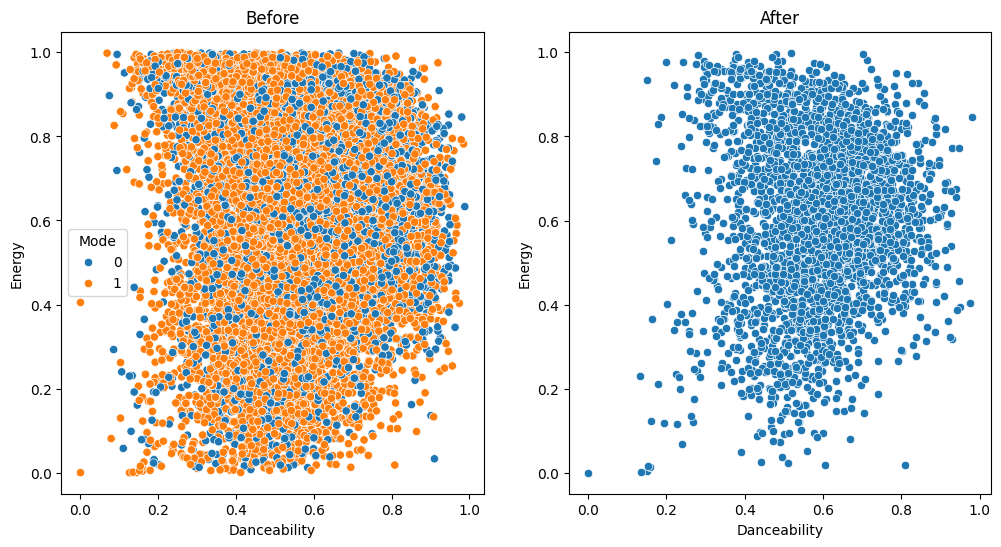

In [21]:
# Now that we are done with each column individually, we are going to compine two attributes, e.g scatterplots
# 4. We'll use scatterplot to see if there is any correlation between Danceability and Energy (we should see positive correlation)
# We map the column 'Mode' to a channel as hue
# We see nothing because of the large amount of data :)
# Maybe we could try to find the correlation stay tuned :)

f, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data = df, x='Danceability', y = 'Energy', hue = 'Mode', ax = axs[0])
axs[0].set_title('Before')

# First we group by the artist and then we find the average. maybe in that way we will reduce the data and observe any correlation
# We remove the columns Track and Genre because they are string columns
grouped_artists = df.drop(columns=['Track', 'Genre', 'Year'], axis = 1)
grouped_artists = grouped_artists.groupby('Artist').mean().reset_index(drop=True)

sns.scatterplot(data = grouped_artists, x='Danceability', y = 'Energy', ax = axs[1])
axs[1].set_title('After')
plt.show()


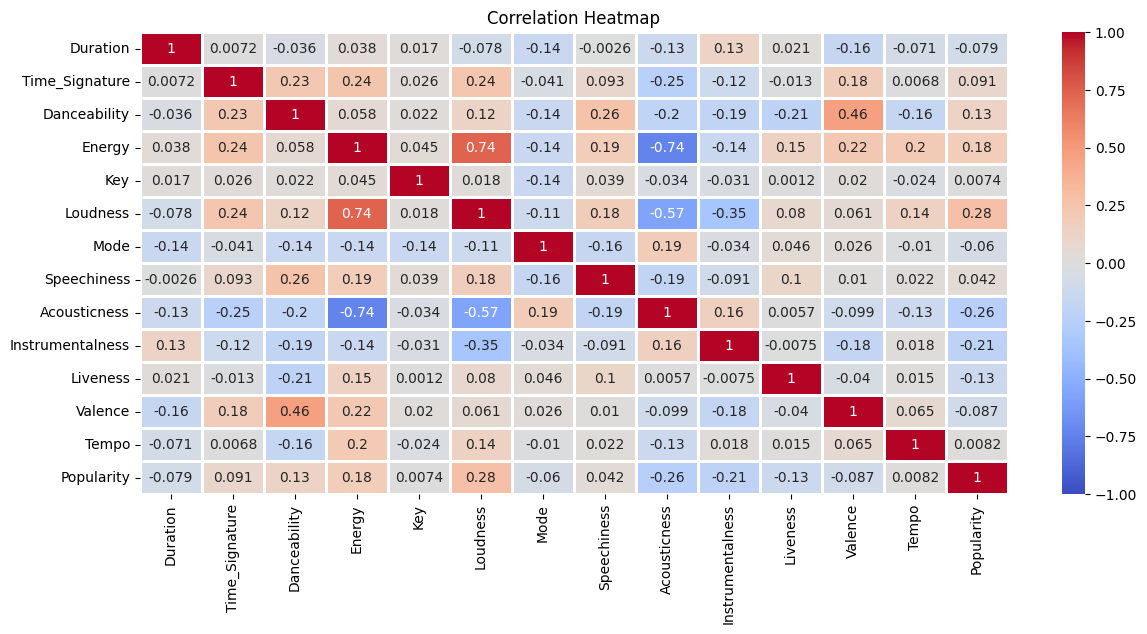

In [22]:
# 5. Find the appropriate plot to visualize the correlations using the grouped_artists data frame (Spoiler alert -> Heatmap)
correlations = grouped_artists.corr()
f, axes = plt.subplots(figsize=(14, 6))
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, linecolor='white', linewidth= 1, cmap="coolwarm",  annot_kws={"size": 10})
axes.set_title('Correlation Heatmap')
plt.show()

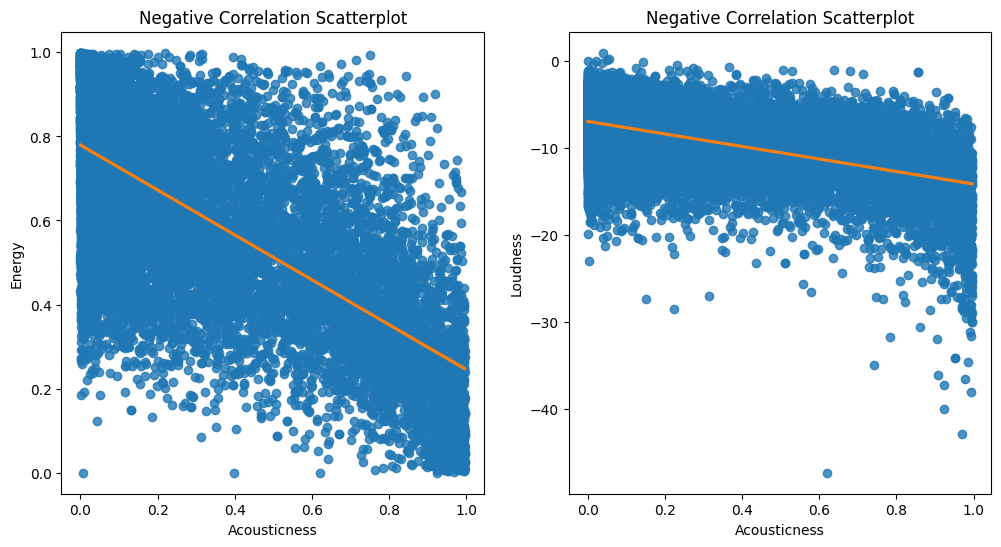

In [23]:
# 6. From the map above we can observe high negative correlation between Acousticness and (Energy and Loudness)
# Let's create the two scatterplots to observe this correlation along with a linear regression line
f, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(data = df, x='Acousticness', y = 'Energy', ax = axs[0], line_kws={"color": "C1"})
axs[0].set_title('Negative Correlation Scatterplot')

sns.regplot(data = df, x='Acousticness', y = 'Loudness', ax = axs[1], line_kws={"color": "C1"})
axs[1].set_title('Negative Correlation Scatterplot')

plt.show()



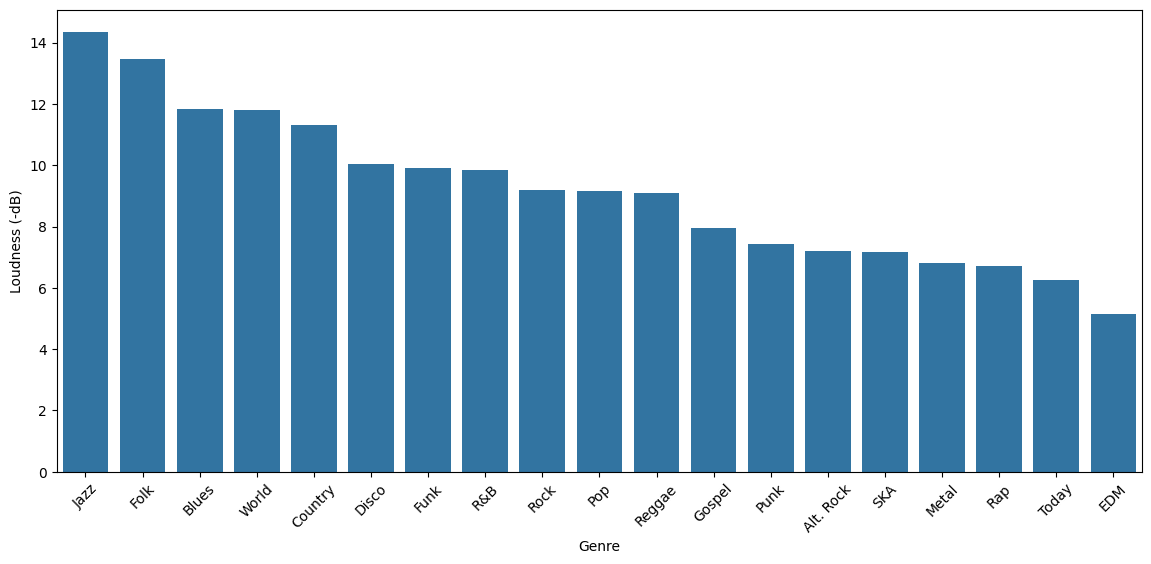

In [24]:
# 7. For each Genre, plot the average Loudness from highest to lowest value
# First we remove the object columns (Track and Artist)
ave_loud = df.drop(['Track', "Artist"], axis = 1)
ave_loud = ave_loud.groupby('Genre').mean().reset_index().loc[:,['Genre', "Loudness"]]
ave_loud['Loudness'] = -ave_loud['Loudness']
plt.subplots(figsize=(14, 6))
sns.barplot(data = ave_loud.sort_values(by = 'Loudness', ascending=False).reset_index(drop=True), x= 'Genre', y = 'Loudness')
plt.xticks(rotation=45)
plt.ylabel('Loudness (-dB)')
plt.show()

## Chapter 3

Now that we are done with EDA, we move to questions that need to be answered using and querying properly the data set. For the questions, chatGPT was used. The questions are ordered from easy to hard level. There is, also, a very hard level which is related to regression and classification analysis. This topic will be covered in the next chapter :)

#### Easy Level

In [25]:
# 1. Which track has the highest popularity?
# Query: Find the track with the maximum popularity value.

most_popular = df.loc[df['Popularity'].idxmax(),'Track']
print(f"The most pupolar song is: {most_popular}")

The most pupolar song is: Espresso


In [26]:
df.loc[df['Popularity'].idxmax(),'Track']

'Espresso'

In [27]:
# 2. What is the average danceability of tracks from 2020?
# Query: Calculate the mean danceability score for tracks released in the year 2020

mean_track_2020 = df.loc[df['Year'] == 2020, 'Danceability'].mean()
print(f"The average danceability of tracks from 2020 is: {round(mean_track_2020, 3)}")

The average danceability of tracks from 2020 is: 0.664


In [28]:
# 3. What is the most common time signature in the dataset?
# Query: Determine the mode (most frequent) value of the "Time_Signature" column.

most_frequent_time_signature = df['Time_Signature'].value_counts().idxmax()

print(f"The most common time signature in the dataset is: {most_frequent_time_signature} with number of value: {df['Time_Signature'].value_counts().max()}")

The most common time signature in the dataset is: 4 with number of value: 13905


In [29]:
# 4. How many unique genres are there in the dataset?
# Query: Count the number of distinct genres present in the "Genre" column.
# (This was answered above in the bar plot about the Genre column)
df['Genre'].value_counts()

Genre
Pop          3669
Metal         922
Country       833
R&B           822
Rock          799
Alt. Rock     780
Jazz          778
Punk          754
Rap           718
EDM           700
Blues         683
Disco         652
Today         620
Folk          575
Reggae        439
Funk          388
SKA           381
World         326
Gospel        311
Name: count, dtype: int64

#### Medium Level

In [30]:
# 5. What is the average energy level of the top 10% most popular tracks?
# Query: Filter the top 10% most popular tracks and compute the average "Energy" for those tracks.

top_ten_percent = df.shape[0]//10
most_popular_tracks_energy = df.sort_values(by='Popularity', ascending = False).reset_index(drop=True).loc[0:top_ten_percent,'Energy'].mean()
print(f"The average energy level of the top 10% most popular tracks is: {round(most_popular_tracks_energy,3)}")


The average energy level of the top 10% most popular tracks is: 0.659


In [31]:
# 6. Which genre has the highest average acousticness?
# Query: Group the dataset by "Genre" and calculate the mean acousticness, then find which genre has the highest value.

highest_average_acousticness = df.drop(['Track', 'Artist'], axis = 1)
highest_average_acousticness = highest_average_acousticness.groupby('Genre').mean()
highest_average_acousticness = highest_average_acousticness['Acousticness']

print(f"The Genre with the highest average acousticness of {round(highest_average_acousticness.max(), 3)} is: {highest_average_acousticness.idxmax()}")

The Genre with the highest average acousticness of 0.732 is: Jazz


In [32]:
# 7. How many tracks have a speechiness greater than 0.05 and are from the year 2015?
# Query: Filter tracks with speechiness > 0.5 and released in 2015, then count how many such tracks exist.

num_tracks_Q7 = df.loc[(df['Speechiness'] > 0.05) & (df['Year'] == 2015),'Track'].count()
print(f"The number of tracks that have a speechiness greater than 0.05 and are from the year 2015 is: {num_tracks_Q7}")

The number of tracks that have a speechiness greater than 0.05 and are from the year 2015 is: 122


In [33]:
# 8. What is the average tempo for tracks with instrumentalness equal to 0?
# Query: Calculate the mean tempo of tracks where the "Instrumentalness" is equal to 0.

mean_tempo_tracks = df.loc[(df['Instrumentalness'] == 0), 'Tempo']
mean_tempo_tracks = mean_tempo_tracks.mean()
print(f"The average tempo for tracks with instrumentalness equal to 0 is {round(mean_tempo_tracks, 3)}")


The average tempo for tracks with instrumentalness equal to 0 is 120.453


#### Hard Level

In [34]:
# 9. Which artist has released the most tracks in the dataset, and what is the average popularity of their tracks?
# Query: Find the artist with the highest number of tracks, and compute the average popularity of their tracks.

popular_artist = df['Artist'].value_counts().reset_index().iloc[0,0]
print(f"The artist who has released the most tracks in the dataset, is: {popular_artist}")

average_popularity = df.loc[df['Artist'] == popular_artist, "Popularity"].mean()
print(f"The average popularity of {popular_artist}, is: {round(average_popularity, 2)}")



The artist who has released the most tracks in the dataset, is: Elton John
The average popularity of Elton John, is: 46.59


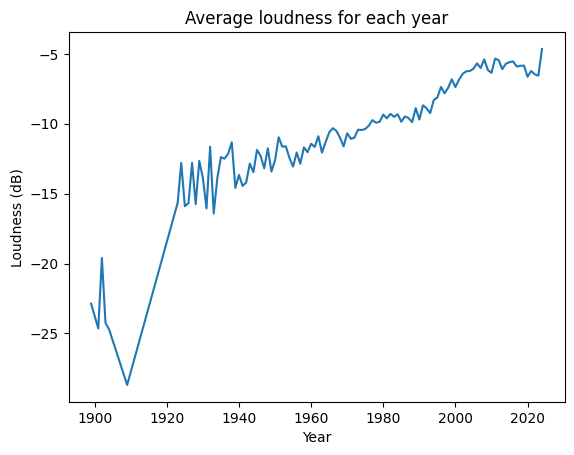

In [35]:
# 10. How has the average loudness of tracks changed over the years?
# Query: Group the data by "Year" and calculate the average loudness for each year, then plot the trend over time.

yearly_average_loudness = df.drop(['Track', 'Artist', 'Genre'], axis = 1)
yearly_average_loudness = yearly_average_loudness.groupby('Year').mean().reset_index()[['Year', "Loudness"]]


sns.lineplot(data = yearly_average_loudness, x = "Year", y = "Loudness")
plt.title("Average loudness for each year")
plt.ylabel("Loudness (dB)")
plt.show()


In [36]:
# 11. What is the relationship between danceability and energy across different genres?
# Query: Group the data by "Genre" and calculate the correlation between "Danceability" and "Energy" within each genre.

rel = df.drop(['Artist', 'Track'], axis = 1)
rel = rel.groupby('Genre').corr()[['Danceability', 'Energy']].reset_index()
rel = rel.loc[(rel['level_1'] == "Danceability") | (rel['level_1'] == "Energy"), :]
rel = rel.set_index("level_1")
rel

,Genre,Danceability,Energy
level_1,,,
Danceability,Alt. Rock,1.000000,-0.134572
Energy,Alt. Rock,-0.134572,1.000000
Danceability,Blues,1.000000,-0.132224
Energy,Blues,-0.132224,1.000000
Danceability,Country,1.000000,0.255185
Energy,Country,0.255185,1.000000
Danceability,Disco,1.000000,0.159495
Energy,Disco,0.159495,1.000000
Danceability,EDM,1.000000,-0.028216


In [37]:
# 12. Which key is most associated with high valence tracks (valence > 0.8)?
# Query: Filter for tracks with a valence greater than 0.8, then find the key that appears most frequently in this subset.
filtered_tracks = df[df.Valence > 0.8]
filtered_tracks_key = filtered_tracks["Key"].value_counts().reset_index()
print(f"The most associated key with valence > 0.8 is: {filtered_tracks_key.iloc[0,0]} and the number of tracks are: {filtered_tracks_key.iloc[0,1]}")

The most associated key with valence > 0.8 is: 0 and the number of tracks are: 449


The unique years are: 
[1899 1901 1902 1903 1904 1909 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


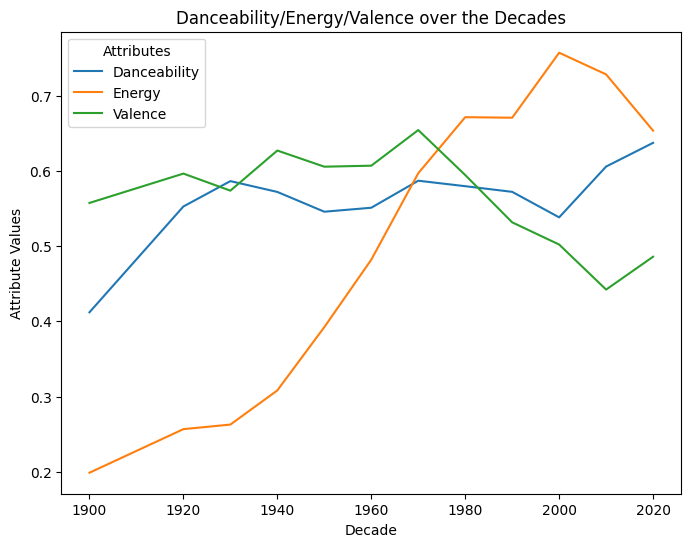

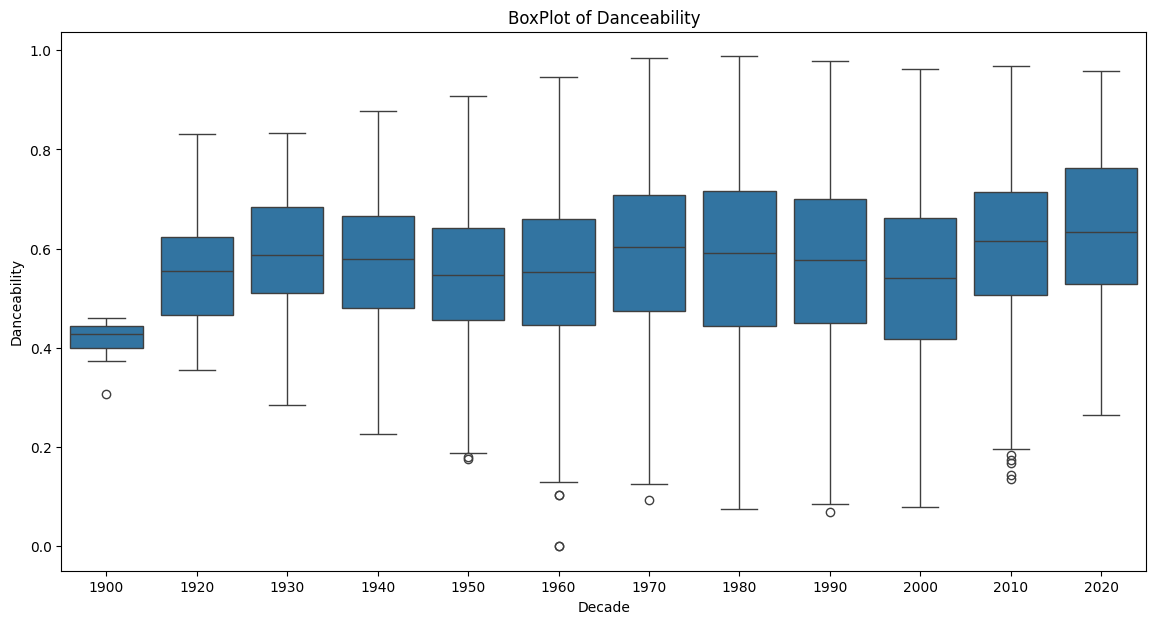

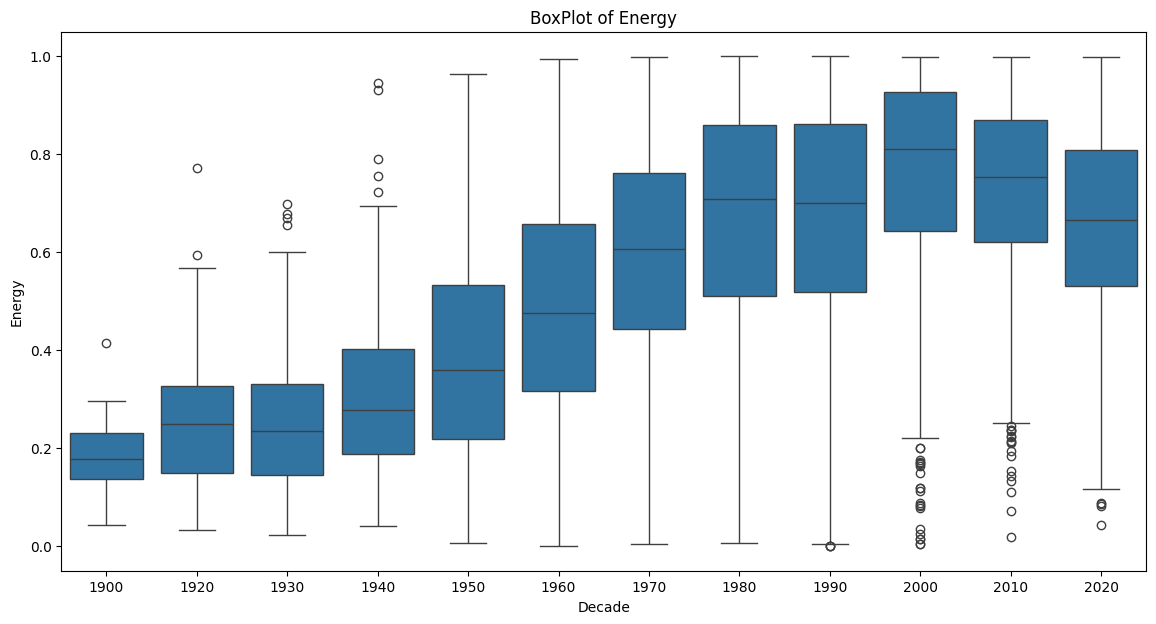

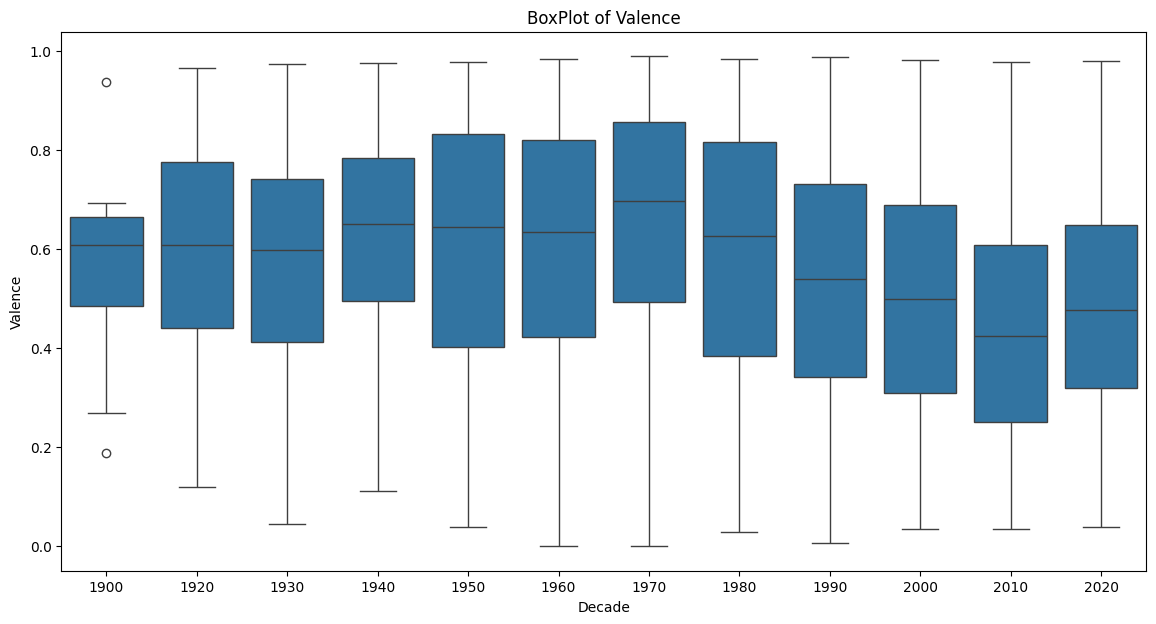

In [38]:
# 13. How has the average danceability, energy, and valence of tracks changed across different decades?
# First, group the dataset by decades (e.g., 1960s, 1970s, etc.), based on the "Year" column. (it's better to create a new variable called Decade)
# Then, calculate the average "Danceability," "Energy," and "Valence" for each decade.
# Finally, visualize the changes for each feature across decades using a multi-line plot and three boxplots of each column

unique_years = np.sort(df['Year'].unique())
print(f"The unique years are: \n{unique_years}")
# Here we have the year 1899 which technically belongs to 1890s but we have only one value so we put it in the decade 1900s
decade = [year+1 if year == 1899  else year - (year%10) for year in df['Year']]
# Add the list decade to the data frame
df_new = df.copy()
df_new['Decade'] = decade

average_dec = df_new.drop(['Track', 'Artist', 'Genre'], axis = 1)
average_dec = average_dec.groupby('Decade').mean()[['Danceability', 'Energy', 'Valence']].reset_index()

# We use this melt function in order to create the lineplot with multiple lines
average_dec = pd.melt(average_dec, ['Decade']).rename(columns = {"variable": "Attributes", "value": "Attribute Values"})
# print(average_dec) -> uncomment to see the output

# This is the lineplot
plt.subplots(figsize=(8, 6))
sns.lineplot(data = average_dec, x = "Decade", y='Attribute Values', hue='Attributes')
plt.title("Danceability/Energy/Valence over the Decades")
plt.show()

# We finalize this chapter with the boxplots for each Decade
decade_values = df_new.drop(['Track', 'Artist', 'Genre'], axis = 1)[['Decade', 'Danceability', 'Energy', 'Valence']]

def boxplots(col):
    if col == "Decade":
        pass
    else:
        plt.subplots(figsize=(14, 7))
        sns.boxplot(data=decade_values, x="Decade", y=col)
        plt.title("BoxPlot of "+col)
        plt.show()

for col_name in decade_values.columns:
    boxplots(col_name)


## Chapter 4

Now we continue to machine learning -> Regression & Classification :)

In [39]:
# Classification -> Random Forest and kNN
# Regression -> LS, Ridge and Lasso Regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
# Classification
# First we are going to split the data into training and testing
X = df.drop(['Track', 'Artist', 'Year', 'Genre'], axis = 1) # Remove Artist, Track and Year because they don't provide any usefull information about the Genre
y = df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

if set(y_train) == set(y_test):
    print("The unique elements of the training and testing class variable Genre are the same.")
else:
    print("Check again the train_test_split() function!")


The unique elements of the training and testing class variable Genre are the same.


In [41]:
# This function is responsible for print the evaluation
def result_classification(test,pred):
    print(print(f"The accuracy score is: {round(accuracy_score(test, pred), 3)} \n"))
    class_report = classification_report(test, pred, target_names = test.unique())
    print(class_report)

In [42]:
# KNN Algorithm
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_fit = knn_model.fit(X_train, y_train)
knn_test_preds = knn_fit.predict(X_test)
result_classification(y_test, knn_test_preds)

The accuracy score is: 0.293 

None
              precision    recall  f1-score   support

     Country       0.09      0.17      0.12       142
         EDM       0.11      0.13      0.12       143
        Rock       0.12      0.20      0.15       151
        Funk       0.09      0.08      0.09       143
       Disco       0.10      0.08      0.08       132
         Pop       0.04      0.03      0.03       115
        Folk       0.06      0.02      0.03        89
         Rap       0.00      0.00      0.00        56
       Metal       0.20      0.18      0.19       168
       Blues       0.08      0.07      0.07       167
        Jazz       0.57      0.93      0.70       736
         R&B       0.16      0.10      0.12       154
         SKA       0.12      0.07      0.09       176
       Today       0.10      0.05      0.06       145
   Alt. Rock       0.04      0.01      0.02        88
      Reggae       0.33      0.14      0.20       169
        Punk       0.04      0.01      0.02  

In [43]:
# Random Forest Algorithm
rf_model = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth = 4)
rf_fit = rf_model.fit(X_train, y_train)
rf_test_preds = rf_fit.predict(X_test)
result_classification(y_test, rf_test_preds)

The accuracy score is: 0.325 

None
              precision    recall  f1-score   support

     Country       0.00      0.00      0.00       142
         EDM       0.00      0.00      0.00       143
        Rock       0.00      0.00      0.00       151
        Funk       0.60      0.02      0.04       143
       Disco       0.88      0.05      0.10       132
         Pop       0.00      0.00      0.00       115
        Folk       0.00      0.00      0.00        89
         Rap       0.00      0.00      0.00        56
       Metal       0.51      0.52      0.51       168
       Blues       0.42      0.57      0.48       167
        Jazz       0.28      0.95      0.44       736
         R&B       0.65      0.42      0.51       154
         SKA       0.00      0.00      0.00       176
       Today       0.58      0.21      0.31       145
   Alt. Rock       0.00      0.00      0.00        88
      Reggae       0.00      0.00      0.00       169
        Punk       0.00      0.00      0.00  

In [44]:
# Regression LS, Ridge and Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [45]:
# Prepare the dataset
# Our y variable will the column Popularity and will use some of the columns

y = df['Popularity']
X = df.drop(['Year', 'Artist', 'Genre', 'Track', 'Popularity'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=12345)


In [46]:
def regression_results(model_fit, test, pred):
    print(f"The coefficients are: \n {[round(coef ,4) for coef in model_fit.coef_]}")
    print(f"The intercept is: \n {model_fit.intercept_}")

    MSE = np.sum((test - pred)**2)/test.shape[0]
    RMSE = np.sqrt(MSE)
    MAE = np.sum(np.absolute(test - pred))/test.shape[0]
    print(f"The Mean Squared Error is: {round(MSE, 2)}")
    print(f"The Root Mean Squared Error is: {round(RMSE, 2)}")
    print(f"The Mean Absolute Error is: {round(MAE, 2)}")

In [47]:
# LS Regression
LS_model = LinearRegression()
LS_fit = LS_model.fit(X_train, y_train)
LS_pred = LS_fit.predict(X_test)
regression_results(LS_fit, y_test, LS_pred)

The coefficients are: 
 [-0.0, 0.7298, 18.4432, -5.3938, 0.0157, 0.8791, -1.514, -4.4414, -10.8191, -9.0273, -10.1982, -13.0752, 0.0053]
The intercept is: 
 59.202149149285006
The Mean Squared Error is: 375.64
The Root Mean Squared Error is: 19.38
The Mean Absolute Error is: 15.91


In [48]:
# Ridge Regression
Ridge_model = Ridge(alpha=5)
Ridge_fit = Ridge_model.fit(X_train, y_train)
Ridge_pred = Ridge_fit.predict(X_test)
regression_results(Ridge_fit, y_test,Ridge_pred)


The coefficients are: 
 [-0.0, 0.7408, 17.9242, -5.4257, 0.0155, 0.8828, -1.5217, -3.9441, -10.764, -8.9506, -10.1363, -12.7969, 0.0046]
The intercept is: 
 59.359182927088625
The Mean Squared Error is: 375.67
The Root Mean Squared Error is: 19.38
The Mean Absolute Error is: 15.91


In [49]:
# Lasso Regression
Lasso_model = Lasso(alpha=5)
Lasso_fit = Lasso_model.fit(X_train, y_train)
Lasso_pred = Lasso_fit.predict(X_test)
regression_results(Lasso_fit, y_test,Lasso_pred)

The coefficients are: 
 [-0.0, 0.0, 0.0, 0.0, 0.0, 0.918, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0091]
The intercept is: 
 55.92973747204156
The Mean Squared Error is: 408.69
The Root Mean Squared Error is: 20.22
The Mean Absolute Error is: 16.78


## Chapter 5

We'll try to reduce the 19 different genres from the column Genre to larger set, using cosine similarity

In [50]:
# The columns are
class_variable = df['Genre'].unique()
string_classes = ", ".join(class_variable)
string_classes

'Alt. Rock, Blues, Country, Disco, EDM, Folk, Funk, Gospel, Jazz, Metal, Pop, Punk, R&B, Rap, Reggae, Rock, SKA, Today, World'

In [51]:
# 1. We will remove the columns Track, Artist, Year, Duration and Popularity
df_processed = df.drop(['Track', 'Artist', 'Year', 'Duration', 'Popularity'], axis=1)

# 2. Group by Genres and take average of the columns below
df_numeric_columns = df_processed.groupby("Genre").mean()[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

# 3. Remove the columns Key, Mode and Time_Signature because in case you uncomment the below, there is no difference between the each Genre
'''
print(df_processed[['Key', 'Genre']].groupby('Genre').value_counts().reset_index().groupby('Genre').max())
print(df_processed[['Mode', 'Genre']].groupby('Genre').value_counts().reset_index().groupby('Genre').max())
print(df_processed[['Time_Signature', 'Genre']].groupby('Genre').value_counts().reset_index().groupby('Genre').max())
'''

# 4. Final data set
final_df = df_numeric_columns.copy()

In [52]:
# Now we will calculate the cosine similarity between each Genre in order then to group the Genres into large sets
from sklearn.metrics.pairwise import cosine_similarity

cosine = pd.DataFrame(cosine_similarity(final_df))

genre_index = final_df.reset_index()['Genre'] 

cosine.columns = genre_index
cosine.index = genre_index

# If we print the result we could observe than the cosime similarity between all the Genres are close to 1. So we are unable to proceed in order to reduce the Genres to larger sets
display(cosine)


Genre,Alt. Rock,Blues,Country,Disco,EDM,Folk,Funk,Gospel,Jazz,Metal,Pop,Punk,R&B,Rap,Reggae,Rock,SKA,Today,World
Genre,,,,,,,,,,,,,,,,,,,
Alt. Rock,1.000000,0.999207,0.999258,0.999644,0.999851,0.998405,0.999588,0.999957,0.997638,0.999992,0.999823,0.999999,0.999651,0.999996,0.999736,0.999855,0.999996,0.999971,0.999033
Blues,0.999207,1.000000,0.999999,0.999907,0.998378,0.999860,0.999932,0.999523,0.999579,0.999055,0.999778,0.999154,0.999908,0.999224,0.999849,0.999739,0.999119,0.998895,0.999990
Country,0.999258,0.999999,1.000000,0.999924,0.998451,0.999838,0.999946,0.999563,0.999538,0.999110,0.999805,0.999206,0.999926,0.999276,0.999871,0.999767,0.999173,0.998957,0.999982
Disco,0.999644,0.999907,0.999924,1.000000,0.999038,0.999546,0.999998,0.999835,0.999104,0.999538,0.999967,0.999607,0.999997,0.999656,0.999992,0.999950,0.999586,0.999423,0.999843
EDM,0.999851,0.998378,0.998451,0.999038,1.000000,0.997291,0.998949,0.999657,0.996317,0.999905,0.999353,0.999871,0.999052,0.999841,0.999196,0.999415,0.999883,0.999949,0.998134
Folk,0.998405,0.999860,0.999838,0.999546,0.997291,1.000000,0.999604,0.998872,0.999921,0.998195,0.999289,0.998332,0.999544,0.998431,0.999424,0.999221,0.998280,0.997974,0.999920
Funk,0.999588,0.999932,0.999946,0.999998,0.998949,0.999604,1.000000,0.999798,0.999187,0.999476,0.999949,0.999549,0.999995,0.999602,0.999982,0.999929,0.999526,0.999354,0.999877
Gospel,0.999957,0.999523,0.999563,0.999835,0.999657,0.998872,0.999798,1.000000,0.998212,0.999917,0.999949,0.999944,0.999845,0.999959,0.999893,0.999965,0.999933,0.999867,0.999386
Jazz,0.997638,0.999579,0.999538,0.999104,0.996317,0.999921,0.999187,0.998212,1.000000,0.997386,0.998750,0.997550,0.999096,0.997667,0.998932,0.998661,0.997485,0.997117,0.999693
